<h1> In Depth: Gaussian Mixture Models</h1>
https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html <br>
Understanding GMM on https://stackoverflow.com/questions/41631161/understanding-gaussian-mixture-models


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

[[-0.71239066  0.75376638]
 [-0.04450308  0.45181234]]


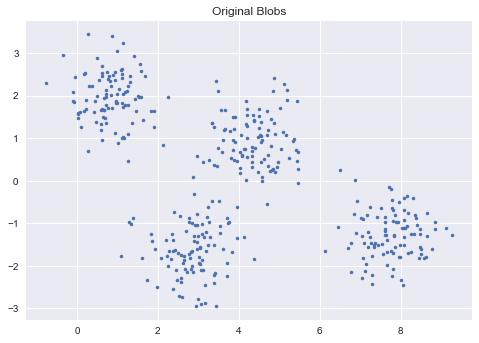

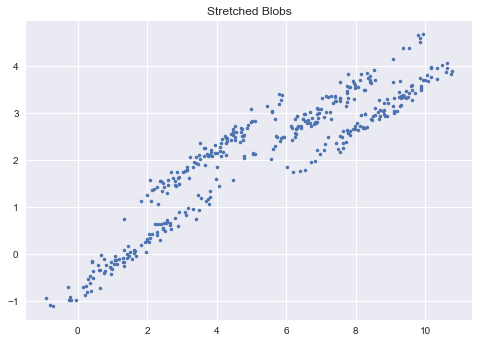

In [14]:
rng = np.random.RandomState(13)
print(rng.randn(2,2))
X_stretched = np.dot(X, rng.randn(2,2))
#print(X_stretched)
plt.title("Original Blobs")
plt.plot(X[:,0],X[:,1], marker='.', linestyle='none' )
plt.show()
plt.title("Stretched Blobs")
plt.plot(X_stretched[:,0],X_stretched[:,1], marker='.', linestyle='none' )
plt.show()

<h2> GMM

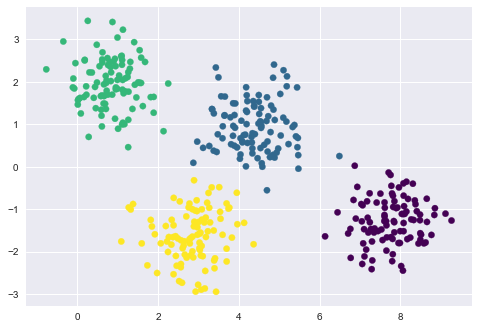

In [18]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')

In [20]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.463 0.537 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]]


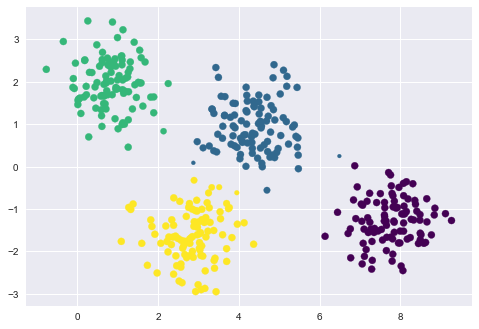

In [24]:
size = 50* probs.max(1) ** 2 # square emphasizes difference
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=size)

In [38]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    # Draw an ellipse with a given position and covariance

    ax = ax or plt.gca()
    
    print("position: ", position)
    print("covariance: \n", covariance)
    
    # Convert covariance to principal axes
    if covariance.shape == (2,2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
        width, height = 2 * np.sqrt(s)
        print("U: ", U)
        print("s: ", s)
        print("Vt: ", Vt)
        print("angle: ", angle)
        print("width: ", width, " height: ", height)
        print("\n")
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label = True, ax = None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap = 'viridis', zorder=2)
    else:
        ax.scatter(X[:,0], X[:,1], s= 40, zorder = 2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha = w * w_factor)
        


position:  [4.36221851 0.93141671]
covariance: 
 [[ 0.40398685 -0.00235346]
 [-0.00235346  0.36933794]]
U:  [[-0.99772208  0.06745858]
 [ 0.06745858  0.99772208]]
s:  [0.40414598 0.36917882]
Vt:  [[-0.99772208  0.06745858]
 [ 0.06745858  0.99772208]]
angle:  176.1319706047611
width:  1.2714495271356179  height:  1.2152017421436023


position:  [0.83760086 1.9579654 ]
covariance: 
 [[ 0.29768676 -0.02444193]
 [-0.02444193  0.34173529]]
U:  [[-0.40656478  0.91362196]
 [ 0.91362196  0.40656478]]
s:  [0.35261203 0.28681002]
Vt:  [[-0.40656478  0.91362196]
 [ 0.91362196  0.40656478]]
angle:  113.98922168493918
width:  1.1876228900649857  height:  1.071092941512502


position:  [ 7.76222624 -1.27635633]
covariance: 
 [[0.36530305 0.01293533]
 [0.01293533 0.28921965]]
U:  [[-0.98660124 -0.16315024]
 [-0.16315024  0.98660124]]
s:  [0.36744211 0.28708059]
Vt:  [[-0.98660124 -0.16315024]
 [-0.16315024  0.98660124]]
angle:  -170.61020492186654
width:  1.2123400722959166  height:  1.07159803901081

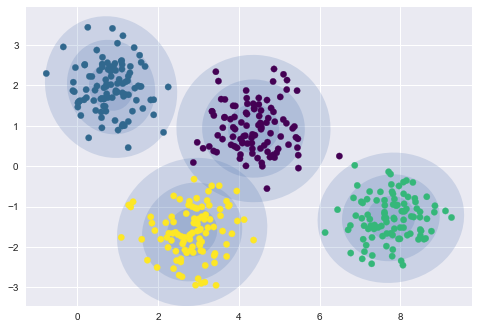

In [39]:
gmm = GaussianMixture(n_components =4, random_state = 42)
plot_gmm(gmm, X)


position:  [7.12609191 3.12408539]
covariance: 
 [[1.40799919 0.71828727]
 [0.71828727 0.38752591]]
U:  [[-0.8885698  -0.45874144]
 [-0.45874144  0.8885698 ]]
s:  [1.77882897 0.01669613]
Vt:  [[-0.8885698  -0.45874144]
 [-0.45874144  0.8885698 ]]
angle:  -152.69407508687155
width:  2.6674549416402575  height:  0.2584270473498802


position:  [1.62581141 0.11095536]
covariance: 
 [[1.4736701  0.75963054]
 [0.75963054 0.41028365]]
U:  [[-0.88696885 -0.46182925]
 [-0.46182925  0.88696885]]
s:  [1.8691965  0.01475725]
Vt:  [[-0.88696885 -0.46182925]
 [-0.46182925  0.88696885]]
angle:  -152.49479131903988
width:  2.7343712257637085  height:  0.24295881182899348


position:  [3.76995847 2.13214542]
covariance: 
 [[1.07298223 0.56483074]
 [0.56483074 0.31549068]]
U:  [[-0.88230653 -0.47067525]
 [-0.47067525  0.88230653]]
s:  [1.37429684 0.01417607]
Vt:  [[-0.88230653 -0.47067525]
 [-0.47067525  0.88230653]]
angle:  -151.92186285207046
width:  2.344608143330763  height:  0.23812657498075876




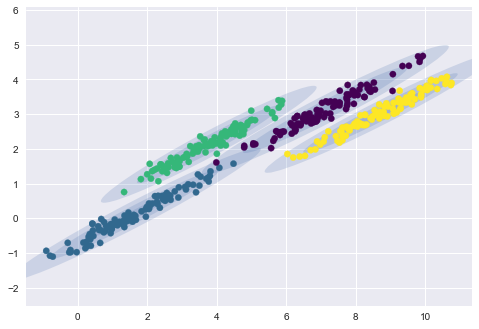

In [42]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state = 42)
plot_gmm(gmm, X_stretched)



<h2> GMM as a Density Estimation

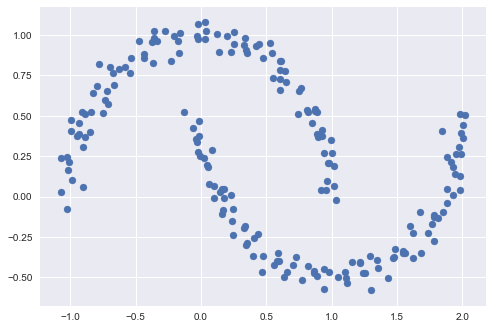

In [43]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

position:  [-0.14655377  0.63648337]
covariance: 
 [[0.35020469 0.05044723]
 [0.05044723 0.09580468]]
U:  [[-0.98223298 -0.18766558]
 [-0.18766558  0.98223298]]
s:  [0.35984314 0.08616622]
Vt:  [[-0.98223298 -0.18766558]
 [-0.18766558  0.98223298]]
angle:  -169.18341835864052
width:  1.1997385447896054  height:  0.5870816779228262


position:  [ 1.13342753 -0.12841187]
covariance: 
 [[0.35025062 0.04830866]
 [0.04830866 0.09907425]]
U:  [[-0.98319171 -0.18257619]
 [-0.18257619  0.98319171]]
s:  [0.35922142 0.09010346]
Vt:  [[-0.98319171 -0.18257619]
 [-0.18257619  0.98319171]]
angle:  -169.48014849608776
width:  1.1987016616815314  height:  0.6003447531527929




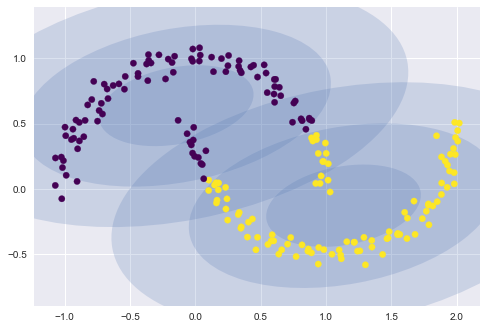

In [44]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

position:  [-0.85012528  0.50300244]
covariance: 
 [[0.01359769 0.01428541]
 [0.01428541 0.02158577]]
U:  [[-0.60445744 -0.79663743]
 [-0.79663743  0.60445744]]
s:  [0.03242498 0.00275848]
Vt:  [[-0.60445744 -0.79663743]
 [-0.79663743  0.60445744]]
angle:  -127.18981004326042
width:  0.36013877643470615  height:  0.10504241684453998


position:  [ 0.58056811 -0.38663301]
covariance: 
 [[ 0.01170574 -0.0009856 ]
 [-0.0009856   0.00065096]]
U:  [[-0.99611034  0.08811468]
 [ 0.08811468  0.99611034]]
s:  [0.01179293 0.00056377]
Vt:  [[-0.99611034  0.08811468]
 [ 0.08811468  0.99611034]]
angle:  174.9448447233443
width:  0.21719048215311454  height:  0.04748776716087273


position:  [0.75008629 0.60482693]
covariance: 
 [[ 0.02146376 -0.02400446]
 [-0.02400446  0.03082268]]
U:  [[-0.63586968  0.77179644]
 [ 0.77179644  0.63586968]]
s:  [0.05059954 0.00168691]
Vt:  [[-0.63586968  0.77179644]
 [ 0.77179644  0.63586968]]
angle:  129.48451715844297
width:  0.4498868129391027  height:  0.0821440

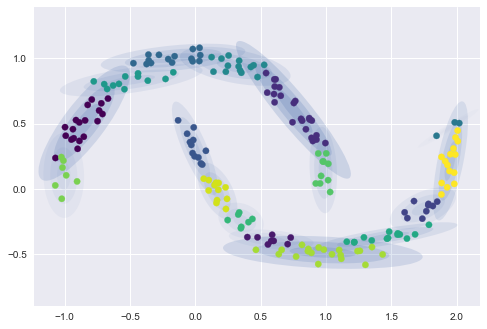

In [45]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon)

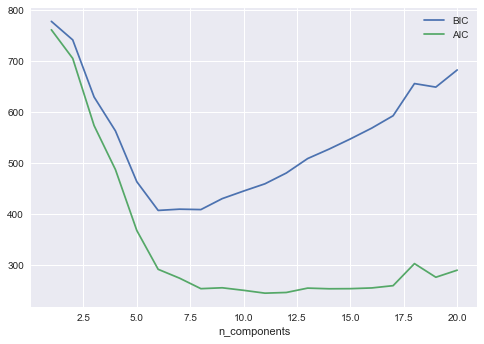

In [70]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

position:  [-0.84497415  0.47216279]
covariance: 
 [[0.02362719 0.03320328]
 [0.03320328 0.06334075]]
U:  [[-0.49332731 -0.86984376]
 [-0.86984376  0.49332731]]
s:  [0.08217181 0.00479613]
Vt:  [[-0.49332731 -0.86984376]
 [-0.86984376  0.49332731]]
angle:  -119.55951168755094
width:  0.5733125220871317  height:  0.13850812858257489


position:  [ 1.03417022 -0.44109815]
covariance: 
 [[0.10319563 0.00292334]
 [0.00292334 0.00397346]]
U:  [[-0.99956701 -0.02942432]
 [-0.02942432  0.99956701]]
s:  [0.10328169 0.00388741]
Vt:  [[-0.99956701 -0.02942432]
 [-0.02942432  0.99956701]]
angle:  -178.31386719538443
width:  0.6427493689579697  height:  0.12469812483170897


position:  [0.8141197  0.47329677]
covariance: 
 [[ 0.02760124 -0.04092794]
 [-0.04092794  0.07246241]]
U:  [[-0.50960483  0.86040858]
 [ 0.86040858  0.50960483]]
s:  [0.0967033  0.00336034]
Vt:  [[-0.50960483  0.86040858]
 [ 0.86040858  0.50960483]]
angle:  120.63751103228083
width:  0.6219430932804386  height:  0.11593689352

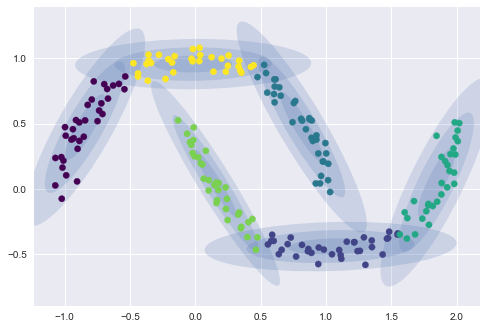

In [71]:
gmm6 = GaussianMixture(n_components=6, covariance_type='full', random_state=0)
plot_gmm(gmm6, Xmoon)

position:  [-0.93811922  0.33478169]
covariance: 
 [[0.00799512 0.01490987]
 [0.01490987 0.04856743]]
U:  [[-0.31163064 -0.95020332]
 [-0.95020332  0.31163064]]
s:  [0.0534573  0.00310525]
Vt:  [[-0.31163064 -0.95020332]
 [-0.95020332  0.31163064]]
angle:  -108.1575276415985
width:  0.4624166853551901  height:  0.11144958514472128


position:  [ 0.80050675 -0.45625115]
covariance: 
 [[ 0.05084086 -0.01041293]
 [-0.01041293  0.00396574]]
U:  [[-0.97822952  0.2075259 ]
 [ 0.2075259   0.97822952]]
s:  [0.05304991 0.00175669]
Vt:  [[-0.97822952  0.2075259 ]
 [ 0.2075259   0.97822952]]
angle:  168.02259680938414
width:  0.4606513006677564  height:  0.0838258346081881


position:  [0.75846032 0.59371644]
covariance: 
 [[ 0.02058233 -0.02276293]
 [-0.02276293  0.02912204]]
U:  [[-0.63860634  0.76953359]
 [ 0.76953359  0.63860634]]
s:  [0.04801212 0.00169225]
Vt:  [[-0.63860634  0.76953359]
 [ 0.76953359  0.63860634]]
angle:  129.68797620973157
width:  0.43823336681949837  height:  0.082274007

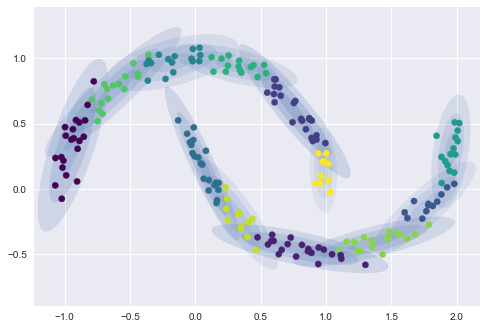

In [72]:
gmm12 = GaussianMixture(n_components=12, covariance_type='full', random_state=0)
plot_gmm(gmm12, Xmoon)

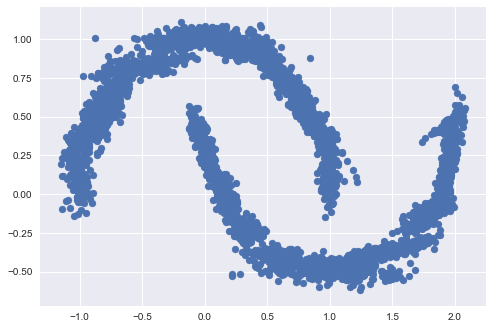

In [99]:
Xnew = gmm16.sample(4000)
x, y = Xnew
#print(x)

plt.scatter(x[:,0], x[:, 1]);

In [73]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

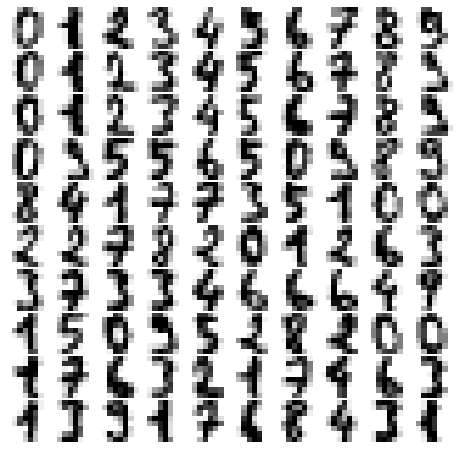

In [74]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

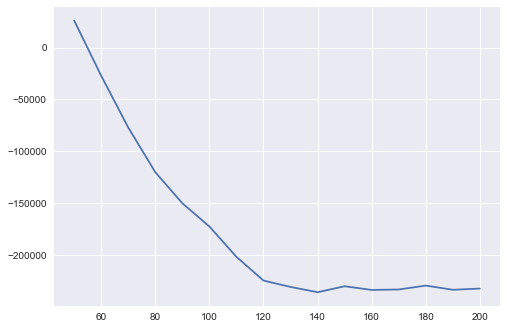

In [77]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [79]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [103]:
data_new = gmm.sample(100)
x, y = data_new
#print(data_new)

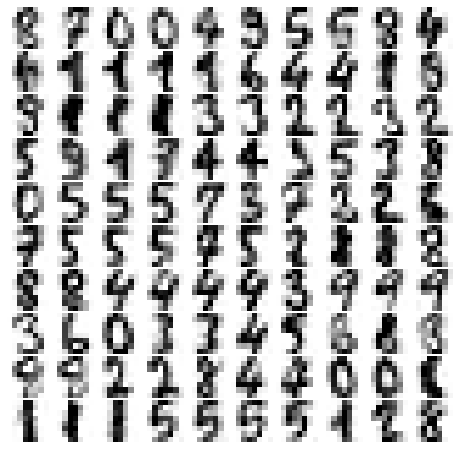

In [104]:
digits_new = pca.inverse_transform(x)
plot_digits(digits_new)